In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import fastcat as fc

### Start with the default xpecgen spectrum

This is not as fast as spekpy but you don't have to install spekpy

In [3]:
s_xp = fc.calculate_spectrum(100,14,3,200,monitor=None) # Calculate the spectrum e_0, theta, e_min, number of points
# Around 8 seconds

Equivalent if you have spekpy installed

In [4]:
s_sp = fc.calculate_spectrum_sp(100,14) # only requires e_0 and theta but can pass kwargs to change the defaults
# Around 0.3 seconds

In [5]:
energy_0_xp, fluence_0_xp = s_xp.get_points() # call them something more descriptive
energy_0_sp, fluence_0_sp = s_sp.get_points() # energy and fluence are stored as x and y in the spectrum object

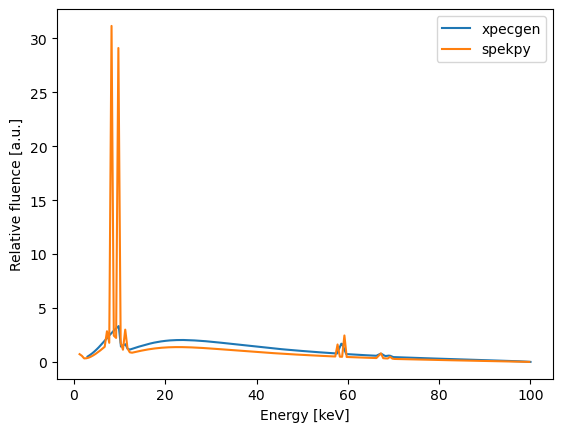

In [6]:
plt.figure()
plt.plot(energy_0_xp, fluence_0_xp/np.mean(fluence_0_xp),label='xpecgen')
plt.plot(energy_0_sp, fluence_0_sp/np.mean(fluence_0_sp),label='spekpy')
plt.xlabel('Energy [keV]')
plt.ylabel('Relative fluence [a.u.]')
plt.legend()

You can see that xpecgen doesn't do the characteristics quite as well and is a bit slower
so I usually use spekpy.

### Filtering

They also filter in different ways

In [7]:
s_sp.filter('Al',4) # filter the spectrum with a 4 mm Al filter
s_xp.attenuate(0.4,mu=fc.get_mu(14)) # needs cm and mu as an interpolating function

In [8]:
energy_1_xp, fluence_1_xp = s_xp.get_points() # call them something more descriptive
energy_1_sp, fluence_1_sp = s_sp.get_points() # energy and fluence are stored as x and y in the spectrum object

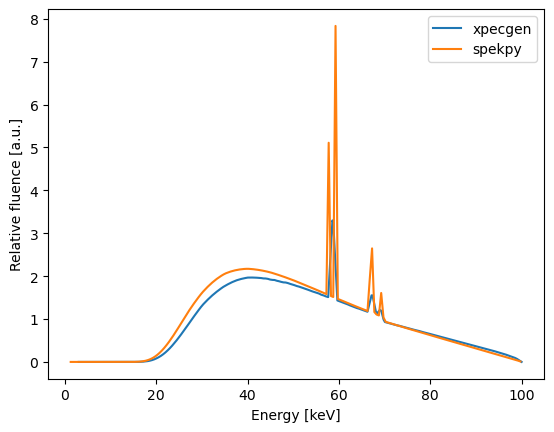

In [9]:
plt.figure()
plt.plot(energy_1_xp, fluence_1_xp/(np.mean(fluence_1_xp)),label='xpecgen')
plt.plot(energy_1_sp, fluence_1_sp/(np.mean(fluence_1_sp)),label='spekpy')
plt.xlabel('Energy [keV]')
plt.ylabel('Relative fluence [a.u.]')
plt.legend()